In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ab_testing.csv')
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [5]:
df.sample(4)

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
4449,15103,B,4,379,No,Desktop,Scotland
3021,11435,A,6,354,No,Mobile,Northern Ireland
2533,13617,B,13,398,No,Mobile,England
681,11322,A,5,242,No,Mobile,Wales


In [6]:
counts = df.groupby(['Group', 'Conversion']).size()
percentages = counts.groupby(level=0).apply(lambda x: x / x.sum() * 100)
formatted = percentages.apply(lambda x: f"{x:.0f}%")
result = formatted.to_frame(name='Conversion Rate')
print(result)


                       Conversion Rate
Group Group Conversion                
A     A     No                     95%
            Yes                     5%
B     B     No                     86%
            Yes                    14%


In [7]:
df1 = df.groupby('Group')['Time Spent']
df1.describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
A,2519.0,241.733227,117.340026,40.0,137.5,241.0,343.0,449.0
B,2481.0,243.303910,119.193552,40.0,136.0,244.0,348.0,449.0


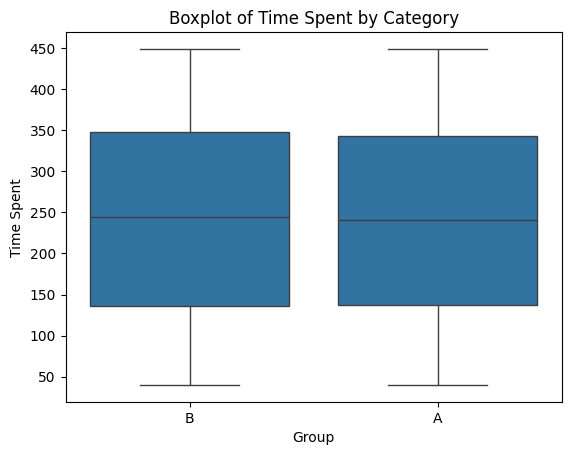

In [8]:
sns.boxplot(x='Group', y='Time Spent', data=df)
plt.title('Boxplot of Time Spent by Category')
plt.show()

In [9]:
df2 = df.groupby('Group')['Page Views']
df2.describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
A,2519.0,7.581580,4.080066,1.0,4.0,8.0,11.0,14.0
B,2481.0,7.492946,3.963448,1.0,4.0,8.0,11.0,14.0


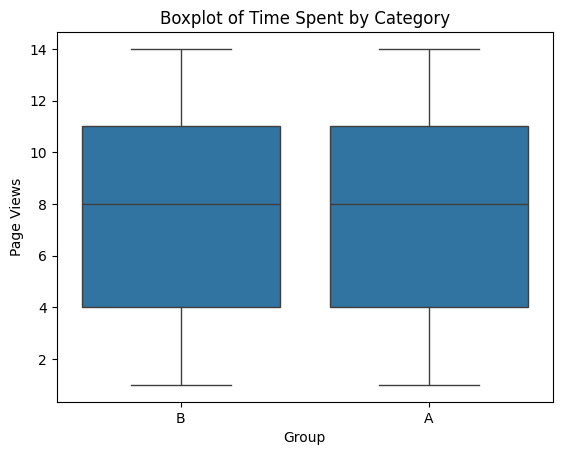

In [10]:
sns.boxplot(x='Group', y='Page Views', data=df)
plt.title('Boxplot of Time Spent by Category')
plt.show()

In [11]:
correlation = df['Time Spent'].corr(df['Page Views'])
print(f"Correlation: {correlation}")

Correlation: -0.001484033594932556
